In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#read the dataset
dataset=pd.read_csv('C://Users//satya//Desktop//Bharat_Internship//wine_quality_prediction//datasets//winequality.csv', sep=';')

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#find missing values in dataset
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot: ylabel='quality'>

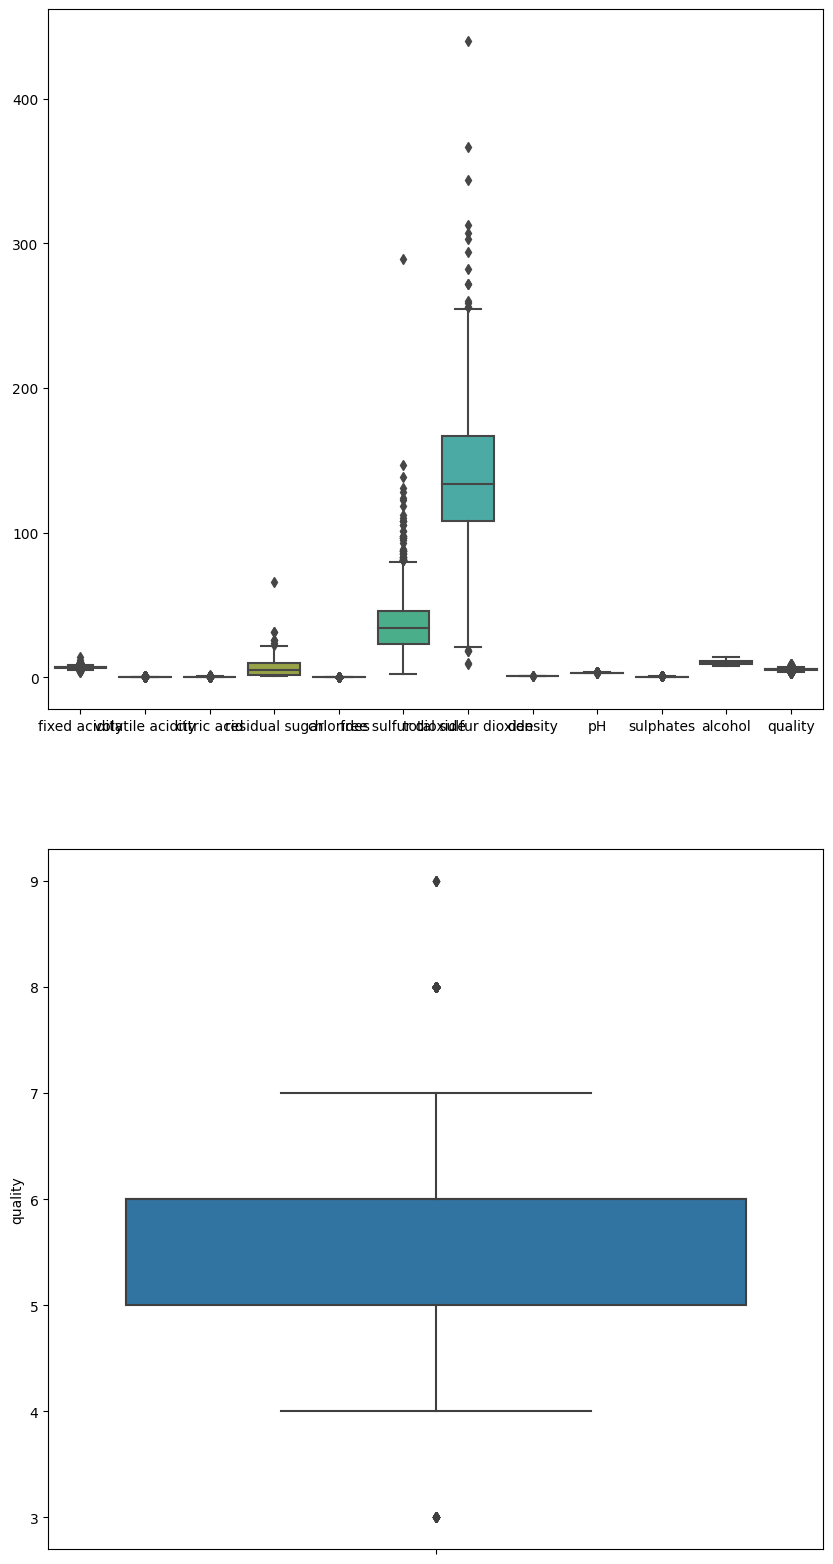

In [5]:
#Distribution of data
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sn.boxplot(data=dataset,orient="v",ax=axes[0])
sn.boxplot(data=dataset,y="quality",orient="pH",ax=axes[1])

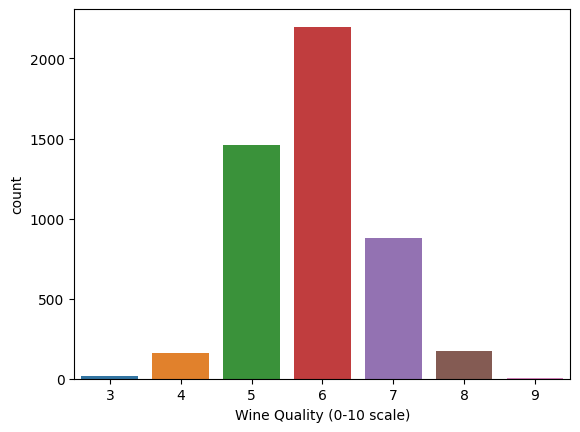

In [6]:
#distribution of class label
sn.countplot(x="quality", data=dataset)
plt.xlabel("Wine Quality (0-10 scale)")
plt.show()

<AxesSubplot: >

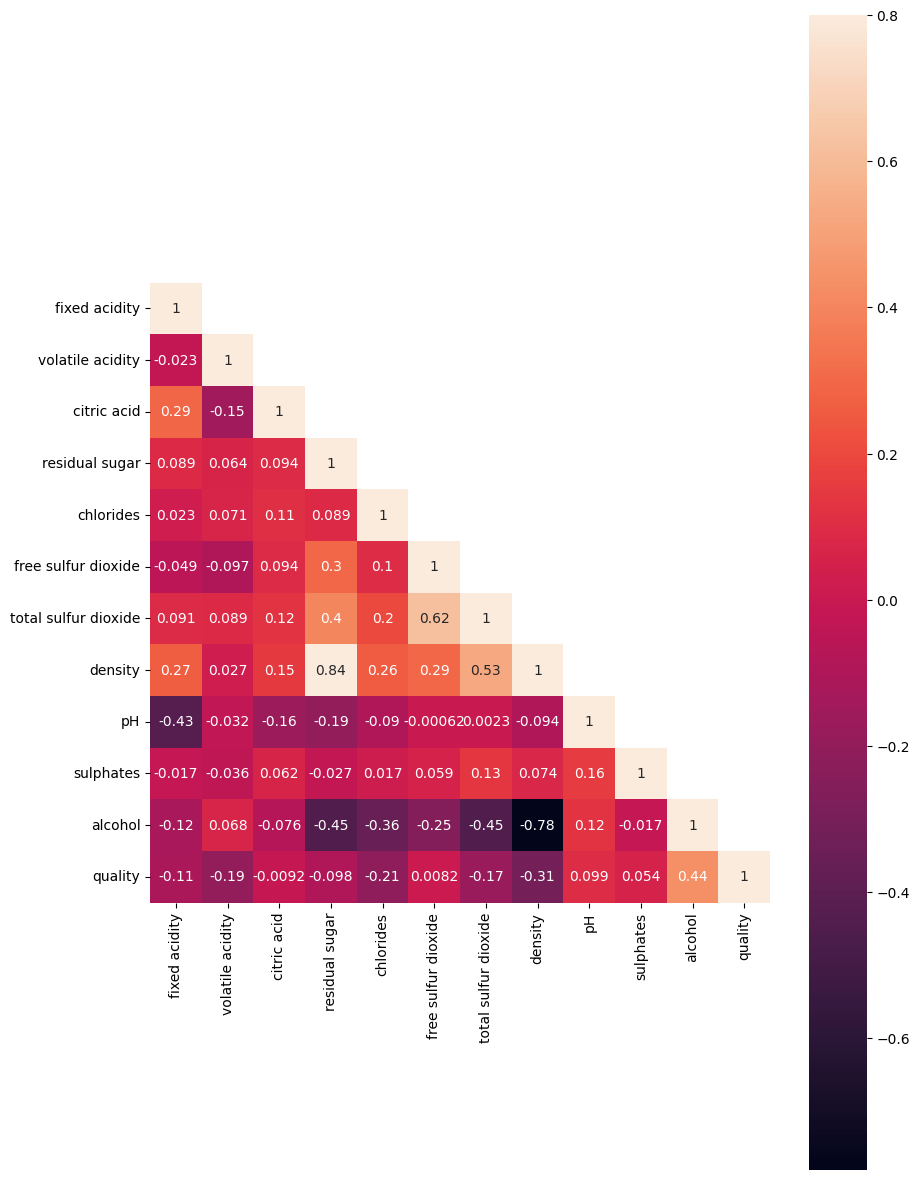

In [12]:
#Correlation analysis
corrMatt=dataset.corr()
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,15)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [9]:
#Splitting class label from other features
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

# adding extra column because of Multiple linear regression
X=np.append(arr=np.ones((X.shape[0],1)), values=X, axis=1)

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scaling the dataset
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

#Prediction
prediction=regressor.predict(X_test)

In [10]:
prediction1=pd.DataFrame(prediction)
prediction1.head()

,0
0,5.590650
1,5.466122
2,6.088268
3,6.793538
4,5.970548


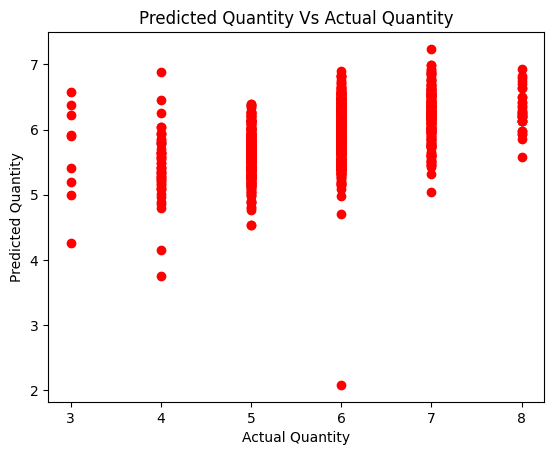

In [11]:
#displaying results
plt.scatter(y_test,prediction, c='r')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Predicted Quantity Vs Actual Quantity')
plt.show()